# Declaration of Originality

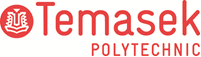

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Muhammad Amirul Irfan Bin Jamal (2404942A)
* Tutorial Group                : P04
* Tutor						    : Mr Emille
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding

Business problem context:

Pricing a used car is often inconsistent and time-consuming because the final selling price depends on many interacting factors such as brand/model popularity, model year, mileage, fuel type, engine specifications, transmission, accident history, and title status. Buyers may overpay if they lack market knowledge, while sellers may underprice or overprice which leads to longer listing times and lesser inquries. A data driven price estimator can improve transparency and decision-making for both buyers and sellers.

Project objective:

The objective of this project is to build a supervised machine learning model that predicts the used car price based on listing attributes. This model will be deployed through a Streamlit web application that allows users to input vehicle details and receive a predicted price. This simulates a realistic business feature such as a price recommendation tool commonly used by car marketplaces and dealerships.

Target users / stakeholders:

- Buyers: estimate whether a listing is fairly priced before purchasing
- Sellers / dealers: set a competitive listing price to improve sales likelihood
- Marketplace platform: improve listing quality and user trust through price guidance

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "used_cars.csv"
df = pd.read_csv(FILE_PATH)
df ## Display dataframe

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
## Check for missing data
df.isna().sum() ## alternativeL df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [6]:
## Describe data distribution
df.describe(include="all")

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
display(df.isna().sum().sort_values(ascending=False))

clean_title     596
fuel_type       170
accident        113
brand             0
model             0
model_year        0
milage            0
engine            0
transmission      0
ext_col           0
int_col           0
price             0
dtype: int64

In [8]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

# Numeric summary
display(df[num_cols].describe())

# Categorical summary (top categories preview)
display(df[cat_cols].describe(include="object"))


Numeric columns: ['model_year']
Categorical columns: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']


,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,16,3309,52,1037,905,2025,2910,3413,39


I did this to separate the numeric and categorical summaries so that it makes it easier to interpret the dataset.  Numeric columns show ranges (min/max) and central tendency (mean/median), while categorical columns show the number of unique categories and the most frequent values. This helps me to decide what preprocessing is needed.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

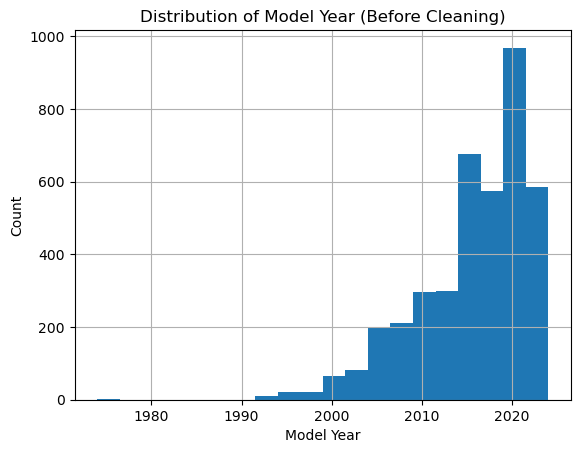

In [20]:
## Understanding distribution of target
## Model year distribution
plt.figure()
df["model_year"].hist(bins=20)
plt.title("Distribution of Model Year (Before Cleaning)")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()

This plot shows the spread of car ages in the dataset and which years are most common. Model year is usually a strong predictor of price, so this helps confirm the dataset contains a reasonable range of vehicle ages and alerts me to any unusual values.

### 2.3.1.2 Understanding distribution of features

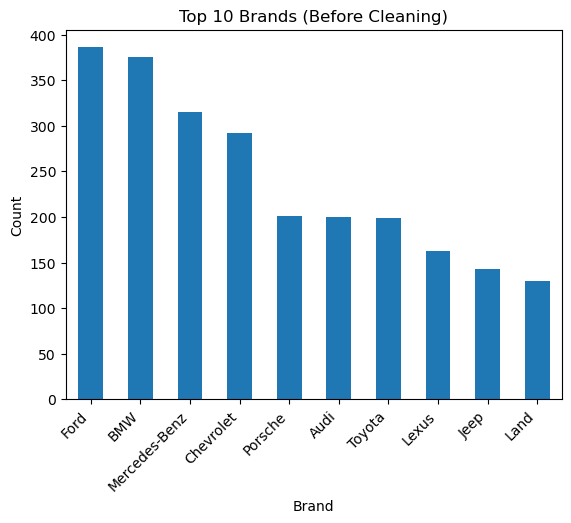

In [19]:
## Understanding distribution of features
## Top 10 brands
top_brands = df["brand"].value_counts().head(10)

plt.figure()
top_brands.plot(kind="bar")
plt.title("Top 10 Brands (Before Cleaning)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()



This shows which brands dominate the dataset. This matters because the model may learn better for brands with more examples and perform worse for rare brands. It also helps plan the Streamlit dropdown choices (common brands will appear more often).

### 2.3.2 Understanding relationship between variables

In [11]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [12]:
## Clean data

## 3.2 Train-Test Split

In [13]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [14]:
## Initialise and train model


# 5. Model Evaluation

In [15]:
## Evaluate model


In [16]:
## New data

## Predict


## Iterative model development


In [17]:
## Further feature engineering / feature selection